## Camera calibration and birds eye persective transformation.
* Use the camera distortion correction matrix developed in camera_calibration
* This matrix is stored in a pickle file and is written once but used
    on every image hence forth

<function matplotlib.pyplot.show(*args, **kw)>

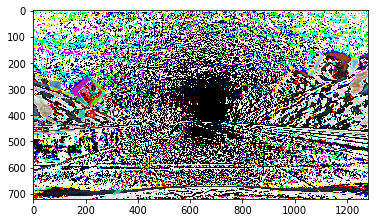

In [6]:
import cv2
import numpy as np
import glob
import pickle

from matplotlib import pyplot as plt

"""
load the camera calibration matrices dist, mtx
dist is the distortion coefficients at grid points in the camera plane
mtx is the camera matrix. Note: these matrices are computed once, 
from the chessborad calibration and used repreated during the pipeline
"""

with open('camera.pickle', 'rb') as handle:
    (dist, mtx) = pickle.load(handle)

#print(dist)
#print(mtx)

images = glob.glob('./test_images/*.jpg')

#loop over images.  Note: this is for testing, place in the
#pipeline as you piece it together

for image in images:
  img = cv2.imread(image)
  dst = cv2.undistort(img, mtx, dist, None, mtx)
  #cv2.imshow('img',dst)
  cv2.imwrite(image.replace('./test_images/', './calibrated_test_images/'),dst)

#fun image created by subtracting the original image
#from the undistorted image
plt.imshow(img-dst)
plt.show

In [13]:
# Run camera correction on video files
## Loop over frames in process image. These movies will be used by the
line detection part of the pipeline.


In [22]:
from moviepy.editor import VideoFileClip

import numpy as np
import glob
import pickle
from moviepy.editor import *
import cv2

##This method is run each time an image is read from the MP4 file
#In this simple case, only the undistortion step is run

def process_image(image):
  #undistort using mtx and dist matrices
  dst = cv2.undistort(image, mtx, dist, None, mtx)
  return dst

#Load the camera correction data from the pickle file
#Note: this camera.pickle is created in camera_calibraion.ipynb
#and is created once 
with open('camera.pickle', 'rb') as handle:
    (dist, mtx) = pickle.load(handle)


out_dir = './calibrated_test_images/'
src_dir = './'

#this loops over all .mp4 files in the directory
movies = glob.glob(src_dir+'*.mp4')

for movie in movies:

   outfile = movie.replace(src_dir,out_dir)
   
   input_clip = VideoFileClip(indir+movie)

   clip = input_clip.fl_image(process_image) #NOTE: this function expects color images!!
   clip.write_videofile(outfile, audio=False)



[MoviePy] >>>> Building video ./calibrated_test_images/project_video.mp4
[MoviePy] Writing video ./calibrated_test_images/project_video.mp4


100%|█████████▉| 1260/1261 [02:33<00:00,  8.44it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./calibrated_test_images/project_video.mp4 

[MoviePy] >>>> Building video ./calibrated_test_images/challenge_video.mp4
[MoviePy] Writing video ./calibrated_test_images/challenge_video.mp4


100%|██████████| 485/485 [00:55<00:00,  8.34it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./calibrated_test_images/challenge_video.mp4 

[MoviePy] >>>> Building video ./calibrated_test_images/harder_challenge_video.mp4
[MoviePy] Writing video ./calibrated_test_images/harder_challenge_video.mp4


100%|█████████▉| 1199/1200 [03:03<00:00,  6.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./calibrated_test_images/harder_challenge_video.mp4 



# Birds eye perspective transformation for individual images
Uses a trapezoidal shape in the source image to transform into 
a distination space.  src points are pts, destination is dst below.

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob

#pts correspond to trapezoid that was determined manually
#once determined, the transform is used throughout to convert to
#the birds eye view.  The dst points are the coordinates in the target
#perspective target image
pts = np.array([[581,477],[699,477],[896,675],[384,675]],dtype = "float32")
dst = np.array([[384,0],[896,0],[896,720],[384,720]],dtype = "float32")
M = cv2.getPerspectiveTransform(pts, dst)

#use the following images to correct edge images
src_dir = './edge_test_images/'
out_dir = './birdseye_edge_test_images/'

#use the following to see the results of perspective transformation
#on the distortion corrected images
#src_dir = './calibrated_test_images/'
#out_dir = './birdseye_test_images/'

images = glob.glob(src_dir+'*.jpg')

for image in images:
  img = cv2.imread(image,-1)
  warped = cv2.warpPerspective(img, M, (1280,720))  
  cv2.imwrite(image.replace(src_dir, out_dir),warped)
  #print(np.shape(warped))



# Birds eye perspective transformation for video frames
This is the same general idea as the cell above except for 
.mp4 movies.  This is only used for visualization.  The 
transformation is used on edge images in practice.


In [ ]:
from moviepy.editor import VideoFileClip
import numpy as np
import glob
import pickle
import cv2

#process image is run once per frame by MoviePy
#The metrix M is created once in the main program
def process_image(image):
  warped = cv2.warpPerspective(image, M, (1280,720))  
  #dst = cv2.undistort(image, mtx, dist, None, mtx)
  return warped


#create the M transformation matrix from the trapezoid and
#target points
pts = np.array([[581,477],[699,477],[896,675],[384,675]],dtype = "float32")
dst = np.array([[384,0],[896,0],[896,720],[384,720]],dtype = "float32")
M = cv2.getPerspectiveTransform(pts, dst)

src_dir = './calibrated_test_images/'
out_dir = './birdseye_test_images/'

movies = glob.glob(src_dir +'*.mp4')

for movie in movies:
   outfile = movie.replace(src_dir,out_dir)
   print(outfile)
   input_clip = VideoFileClip(movie)

   clip = input_clip.fl_image(process_image) #NOTE: this function expects color images!!
   clip.write_videofile(outfile, audio=False)




./birdseye_test_images/harder_challenge_video.mp4
[MoviePy] >>>> Building video ./birdseye_test_images/harder_challenge_video.mp4
[MoviePy] Writing video ./birdseye_test_images/harder_challenge_video.mp4


 24%|██▎       | 282/1200 [00:31<01:59,  7.65it/s]